In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import time
import datetime

In [11]:
df_1 = pd.read_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/reviews_summary.csv')
print("The dataset has {} rows and {} columns.".format(*df_1.shape))

print("It contains {} duplicates.".format(df_1.duplicated().sum()))


The dataset has 401963 rows and 6 columns.
It contains 0 duplicates.


In [12]:
df_1.head(4)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."


In [13]:
df_2 = pd.read_csv('/home/antrigulum/Documents/wor/listings_summary.csv')
df_2.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [14]:
df = pd.merge(df_1, df_2[['neighbourhood_group_cleansed', 'host_id', 'latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [15]:
df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,Mitte,2217,52.534537,13.402557,118,Guesthouse
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,2217,52.534537,13.402557,118,Guesthouse
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...,Mitte,2217,52.534537,13.402557,118,Guesthouse


In [16]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 401963 rows and 12 columns.


In [17]:
properties_per_host = pd.DataFrame(df.groupby('host_id')['listing_id'].nunique())

properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)


,listing_id
host_id,
1625771,44
8250486,38
2293972,28
59442407,19
87442687,16
54942921,16
8912086,15
34705166,15
79430806,15


In [18]:
top1_host = df.host_id == 1625771
df[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Charlottenburg-Wilm.,3
Friedrichshain-Kreuzberg,2
Lichtenberg,1
Mitte,10
Neukölln,1
Pankow,19
Tempelhof - Schöneberg,7
Treptow - Köpenick,1


In [19]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Apartment,44


In [20]:
top2_host = df.host_id == 8250486
df[top2_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top2_host].groupby('neighbourhood_group')['listing_id'].nunique())


,listing_id
neighbourhood_group,
Friedrichshain-Kreuzberg,1
Mitte,37


In [21]:
pd.DataFrame(df[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Hostel,38


In [22]:
top3_host = df.host_id == 2293972
df[top3_host].neighbourhood_group.value_counts()

pd.DataFrame(df[top3_host].groupby('neighbourhood_group')['listing_id'].nunique())


,listing_id
neighbourhood_group,
Friedrichshain-Kreuzberg,24
Lichtenberg,4


In [23]:
pd.DataFrame(df[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Aparthotel,3
Apartment,11
Hostel,6
Loft,1
Serviced apartment,7


In [26]:
df.dropna(inplace=True)
df.isna().sum()

listing_id             0
id                     0
date                   0
reviewer_id            0
reviewer_name          0
comments               0
neighbourhood_group    0
host_id                0
latitude               0
longitude              0
number_of_reviews      0
property_type          0
dtype: int64

In [27]:
df.shape

(401467, 12)

In [29]:
from langdetect import detect

In [30]:
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [31]:
df['language'] = df['comments'].apply(language_detection)

In [32]:
df.language.value_counts().head(10)

en    271821
de     77173
fr     16857
es     12152
it      4872
nl      3913
ru      2310
ko      1643
pt      1397
da      1355
Name: language, dtype: int64

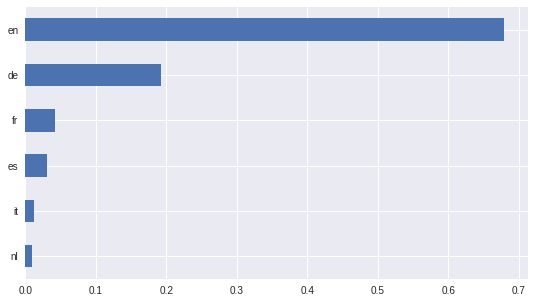

In [33]:
ax = df.language.value_counts(normalize=True).head(6).sort_values().plot(kind='barh', figsize=(9,5));

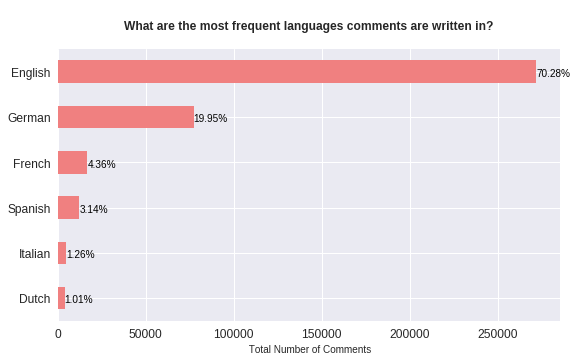

In [34]:
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

ax.invert_yaxis()

In [35]:
df_eng = df[(df['language']=='en')]
df_de  = df[(df['language']=='de')]
df_fr  = df[(df['language']=='fr')]

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
analyzer = SentimentIntensityAnalyzer()

In [45]:
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value


In [50]:
df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)


In [49]:
df_eng.to_csv('C:/Users/DELL/Desktop/job/intership/berlin-airbnb-data/sentiment_df_eng.csv', index=False)

In [52]:
df = df_eng
df.head(6)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.505,0.495,0.9703
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.530,0.470,0.7955
6,2015,76603178,2016-05-28,29323516,Laurent,"We had a very nice stay in Berlin, thanks to J...",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.657,0.343,0.9779
7,2015,77296201,2016-05-31,9025122,Rasmus,"Great location close to Mauerpark, Kastanienal...",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.727,0.273,0.8353
9,2015,82322683,2016-06-27,73902920,Mag,"Apartment very well located, close to everythi...",Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.811,0.189,0.8439
10,2015,85799408,2016-07-13,3862631,Lorenza,My staying at Jan's was perfect: the apartmen...,Mitte,2217,52.534537,13.402557,118,Guesthouse,en,0.0,0.642,0.358,0.9787


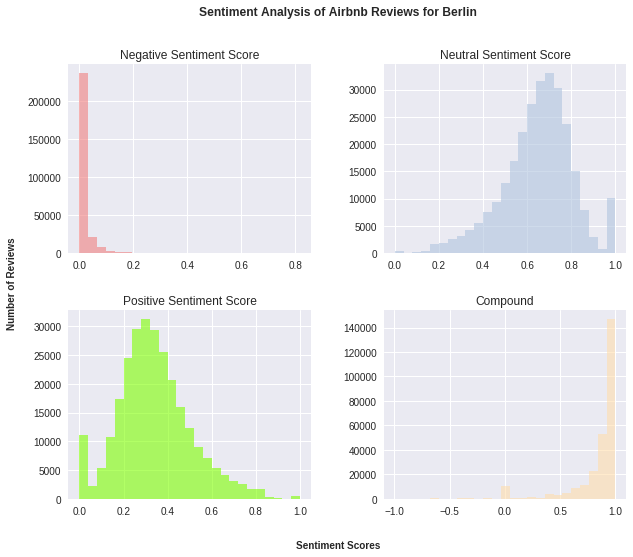

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

plt.suptitle('Sentiment Analysis of Airbnb Reviews for Berlin\n\n', fontsize=12, fontweight='bold');

In [54]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    271821.000000
mean          0.831652
std           0.261928
min          -0.996800
5%            0.051600
10%           0.585900
20%           0.784900
30%           0.862000
40%           0.903200
50%           0.928700
60%           0.946800
70%           0.960800
80%           0.972100
90%           0.982500
max           0.999500
Name: sentiment_compound, dtype: float64

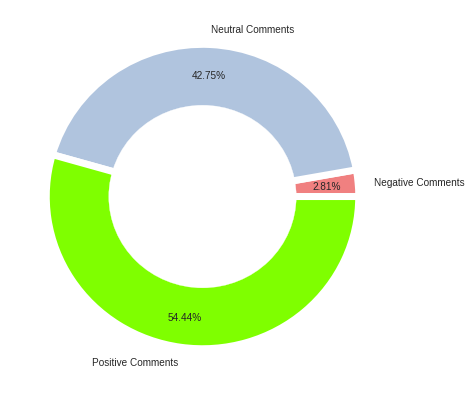

In [55]:
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Neutral Comments','Positive Comments']
size = [neg, mid, pos]

plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

my_circle = plt.Circle((0,0), 0.6, color='white')

fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()
